In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
df = pd.read_csv('/Users/craiglynch/Desktop/Data_Science_Review/Goalcast/Live.csv')
print(df.shape)
df.head()

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Data Cleaning

In [456]:
df.isnull().any()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

In [457]:
print(df['Column1'].unique())
print(df['Column2'].unique())
print(df['Column3'].unique())
print(df['Column4'].unique())

[nan]
[nan]
[nan]
[nan]


In [458]:
# Four columns have no values at all, so I will drop them
df = df.drop(df[['Column1', 'Column2', 'Column3', 'Column4']], axis=1) 

In [459]:
# Check for duplicate rows
df = df.drop_duplicates()
df.shape

(6999, 12)

* Originally had 7050 datapoints and 16 fields
* 4 fields made up of null values dropped 
* 51 duplicate rows dropped
* Moving forward, working with 6999 unique observations

### Exploring the Data

In [460]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [461]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [462]:
df['Date'] = pd.to_datetime(df['status_published']).dt.date
df['Time'] = pd.to_datetime(df['status_published']).dt.time

df = df.sort_values(["Date", "Time"], ascending = (False, True))

print(df['Date'].max())
print(df['Date'].min())

2018-06-13
2012-07-15


In [463]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

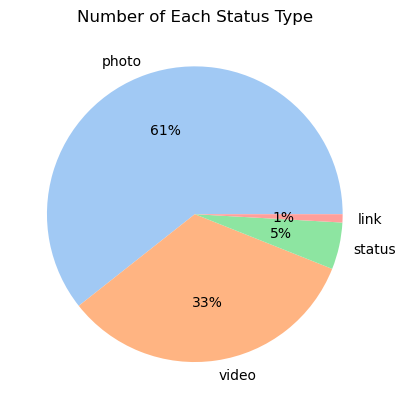

In [464]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['status_type'].value_counts(), labels =df['status_type'].value_counts().index , colors = colors, autopct='%.0f%%')
plt.title('Number of Each Status Type')
plt.show()

In [574]:
reactions = df.groupby('status_type').sum()
reactions = reactions[['num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
reactions["sum"] = reactions.sum(axis=1)
reactions['positive'] = reactions['num_likes'] + reactions['num_loves'] + reactions['num_wows'] + reactions['num_hahas'] 
reactions['negative'] = reactions['num_sads'] + reactions['num_angrys']
reactions= reactions.reset_index()

In [575]:
reactions

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,sum,positive,negative
0,link,359,277,23286,19,12,2,0,0,23955,23319,0
1,photo,65678,10574,721490,5748,2623,793,536,169,807611,730654,705
2,status,13078,925,157797,549,423,40,126,9,172947,158809,135
3,video,1499524,269994,566844,82932,5711,4050,966,593,2430614,659537,1559


Reactions to each status type are overwhelmingly positive

In [467]:
interactions = df.groupby('status_type').sum()
interactions = interactions[['num_reactions','num_comments','num_shares']]
interactions

,num_reactions,num_comments,num_shares
status_type,,,
link,23319,359,277
photo,731372,65678,10574
status,158944,13078,925
video,661102,1499524,269994


reactions['sum'] - interactions['num_reactions']:
* link = 23319 - 23319 = 0
* photo = 731359 - 731344 = -13
* status = 158944 - 158944 = 0
* video = 661096 - 661102 = -6

Since the difference between reactions['sum'] and interactions['num_reactions'] is small (~19 out of 1.5 million) I will use the sume of reactions instead of the given num_reactions.

In [468]:
temp = reactions.set_index('status_type')
temp = pd.concat([temp,interactions],axis=1)
temp.rename({'sum': 'sum_reactions'}, axis=1, inplace=True)
interactions = temp[['sum_reactions','num_comments','num_shares']]
interactions

,sum_reactions,num_comments,num_shares
status_type,,,
link,23319,359,277
photo,731359,65678,10574
status,158944,13078,925
video,661096,1499524,269994


In [469]:
# Interactions per post

perPost = interactions.T
perPost['link'] = perPost['link'].div(63)
perPost['status'] = perPost['status'].div(359)
perPost['video'] = perPost['video'].div(2333)
perPost['photo'] = perPost['photo'].div(4244)
perPost = perPost.T

In [470]:
perPost

,sum_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,172.327757,15.475495,2.491517
status,442.740947,36.428969,2.576602
video,283.367338,642.744964,115.728247


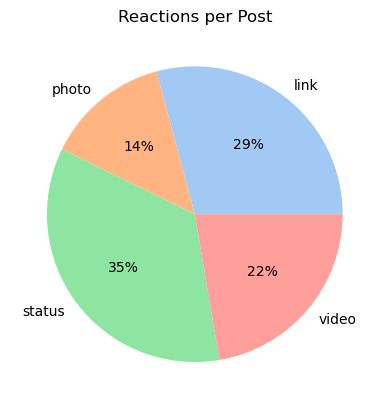

In [471]:
# Reactions
data = perPost['sum_reactions']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Reactions per Post')
plt.show()

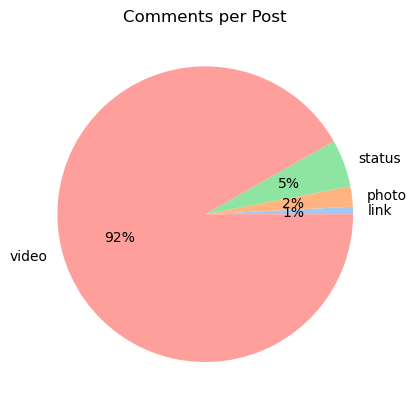

In [472]:
# Comments
data = perPost['num_comments']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Comments per Post')
plt.show()

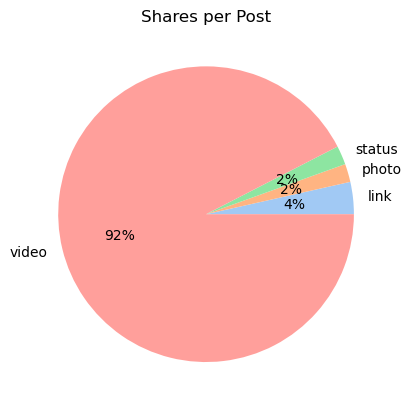

In [473]:
# Shares
data = perPost['num_shares']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Shares per Post')
plt.show()

Per post, videos get the most shares and comments, statuses get the most reactions

#### Breakdown by interaction type

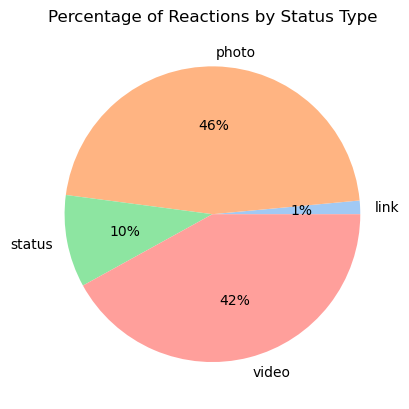

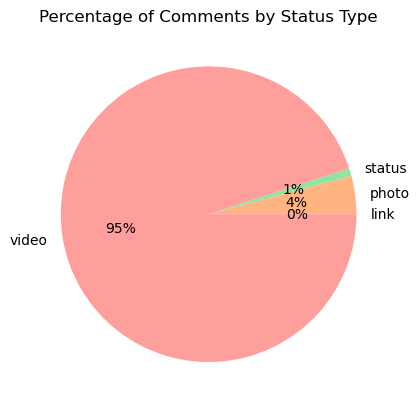

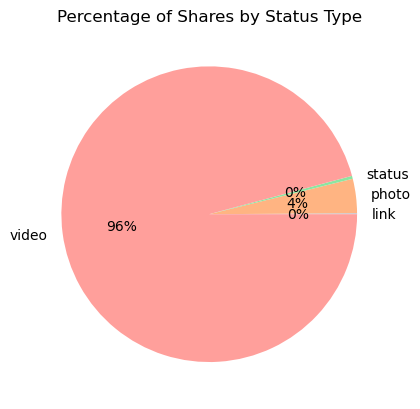

In [474]:
# Reactions
data = interactions['sum_reactions']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Reactions by Status Type')
plt.show()

# Comments
data = interactions['num_comments']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Comments by Status Type')
plt.show()

# Shares
data = interactions['num_shares']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Shares by Status Type')
plt.show()

While photos and videos get similar percentages of user reactions, video gets the highest percentage of comments and shares

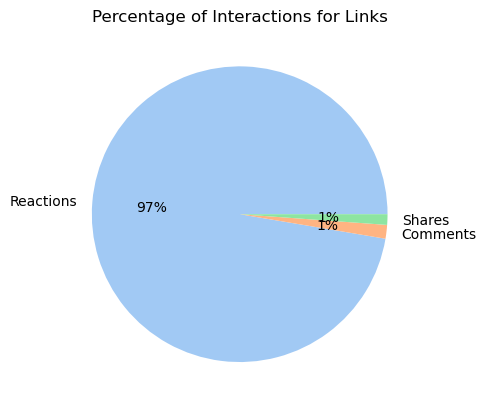

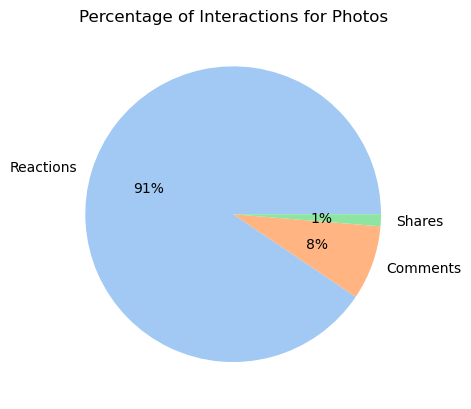

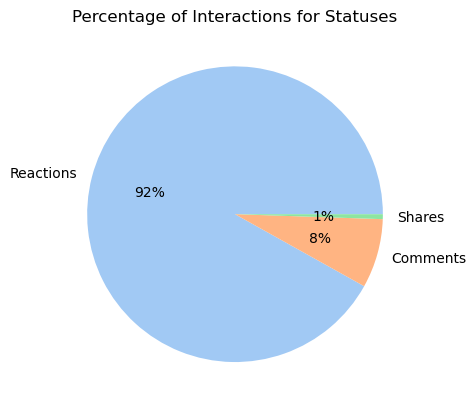

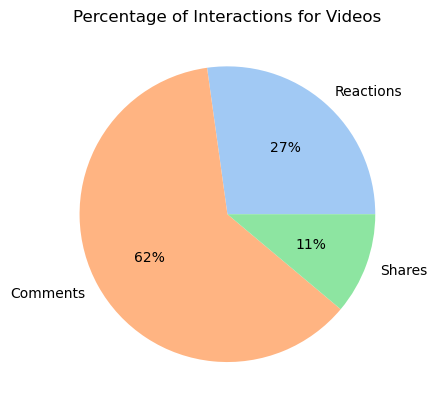

In [475]:
status_type = interactions.T
# Link
data = status_type['link']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Links')
plt.show()

# Photo
data = status_type['photo']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Photos')
plt.show()

# Status
data = status_type['status']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Statuses')
plt.show()

# Video
data = status_type['video']
labels = ['Reactions','Comments','Shares']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Interactions for Videos')
plt.show()

* Links, statuses, and photos get high levels of reactions
* Videos get high percentage of comments, and the highest percentage of shares

In [476]:
corr = interactions[['sum_reactions','num_comments','num_shares']].corr()
corr

,sum_reactions,num_comments,num_shares
sum_reactions,1.000000,0.535166,0.532400
num_comments,0.535166,1.000000,0.999984
num_shares,0.532400,0.999984,1.000000


The number of comments and the number of shares is correlated

In [477]:
corr = df[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys','num_comments','num_shares']].corr()
corr

,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_comments,num_shares
num_likes,1.000000,0.212715,0.200015,0.123129,0.057110,0.096276,0.105934,0.179664
num_loves,0.212715,1.000000,0.510148,0.507899,0.226574,0.394818,0.521320,0.820284
num_wows,0.200015,0.510148,1.000000,0.288468,0.091425,0.191672,0.163506,0.409803
num_hahas,0.123129,0.507899,0.288468,1.000000,0.154035,0.225083,0.325064,0.399864
num_sads,0.057110,0.226574,0.091425,0.154035,1.000000,0.143711,0.257545,0.218628
num_angrys,0.096276,0.394818,0.191672,0.225083,0.143711,1.000000,0.239557,0.332355
num_comments,0.105934,0.521320,0.163506,0.325064,0.257545,0.239557,1.000000,0.640536
num_shares,0.179664,0.820284,0.409803,0.399864,0.218628,0.332355,0.640536,1.000000


Users are more likely to comment or share if they "love" the status type

In [478]:
interactions['total'] = interactions['sum_reactions'] + interactions['num_comments'] + interactions['num_shares']
interactions

<ipython-input-478-60630a93368f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions['total'] = interactions['sum_reactions'] + interactions['num_comments'] + interactions['num_shares']


,sum_reactions,num_comments,num_shares,total
status_type,,,,
link,23319,359,277,23955
photo,731359,65678,10574,807611
status,158944,13078,925,172947
video,661096,1499524,269994,2430614


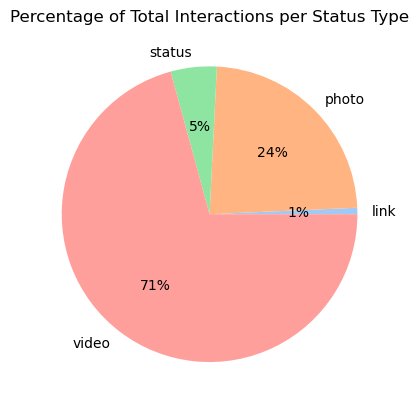

In [479]:
data = interactions['total']
labels = ['link','photo','status','video']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of Total Interactions per Status Type')
plt.show()

Videos have the most total interactions

### Feature Engineering

In [480]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date,Time
4732,614855718638584_855483231242497,video,6/13/2018 0:58,97,177,210,48,49,0,0,0,0,2018-06-13,00:58:00
4731,614855718638584_855485821242238,video,6/13/2018 0:59,27,0,18,27,0,0,0,0,0,2018-06-13,00:59:00
4730,614855718638584_855501374574016,photo,6/13/2018 1:12,2,0,0,2,0,0,0,0,0,2018-06-13,01:12:00
4752,614855718638584_853742228083264,video,6/12/2018 1:01,182,356,229,109,72,0,1,0,0,2018-06-12,01:01:00
4751,614855718638584_853747008082786,video,6/12/2018 1:03,29,0,3,29,0,0,0,0,0,2018-06-12,01:03:00


In [481]:
# Creating the sum reactions (like above) due to the discrepancy between num_reactions
df['sum_reactions'] = df['num_likes'] + df['num_loves'] + df['num_wows'] + df['num_hahas'] + df['num_sads'] + df['num_angrys']
df['total_interaction'] = df['sum_reactions'] + df['num_comments'] + df['num_shares']

# convert the 'Date' column to datetime format
df['Date'] = df['Date'].astype('datetime64[ns]')
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

datetime = df[['status_type','total_interaction','hour','day','month','year','day_of_week']]
datetime

,status_type,total_interaction,hour,day,month,year,day_of_week
4732,video,484,0,13,6,2018,2
4731,video,45,0,13,6,2018,2
4730,photo,2,1,13,6,2018,2
4752,video,767,1,12,6,2018,1
4751,video,32,1,12,6,2018,1
...,...,...,...,...,...,...,...
2624,photo,18,6,15,7,2012,6
2623,photo,24,6,15,7,2012,6
2622,photo,15,6,15,7,2012,6
2621,photo,63,8,15,7,2012,6


In [482]:
datetime.groupby('year').sum()[['total_interaction']]

,total_interaction
year,
2012,16552
2013,49055
2014,147095
2015,533334
2016,170390
2017,1081573
2018,1437128


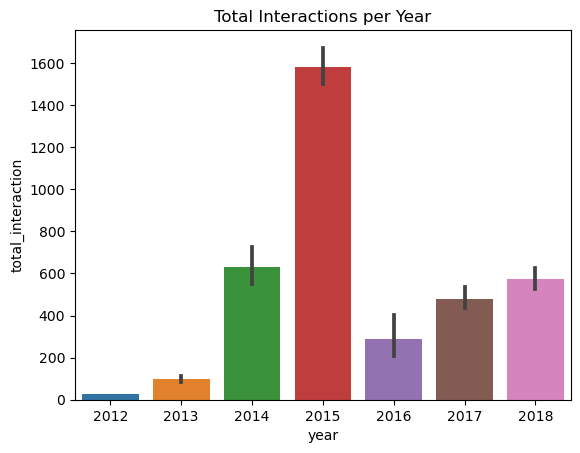

In [483]:
# Interactions per year
sns.barplot (data=datetime , y='total_interaction',x='year')
plt.title('Total Interactions per Year')
plt.show()

#### Facebook launches "reactions" in 2016. This introduction may have affected how the algorithms calculate interactions

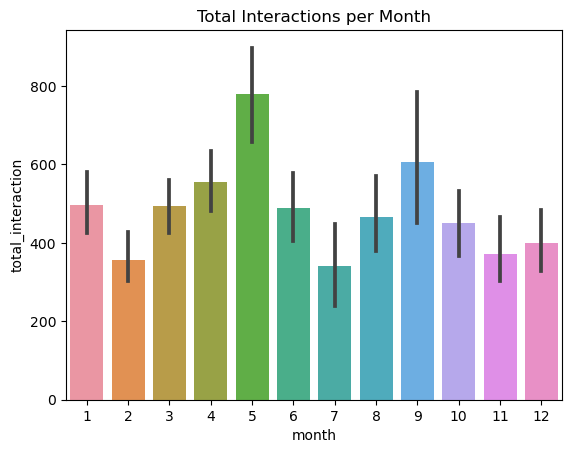

In [484]:
# Interactions per month
sns.barplot (data=datetime , y='total_interaction',x='month')
plt.title('Total Interactions per Month')
plt.show()

#### Spring and Fall appear to have more user interactions

Data begins in July, 2012 and ends in June, 2018. - This makes nearly a full year so I will not adjust the monthly data

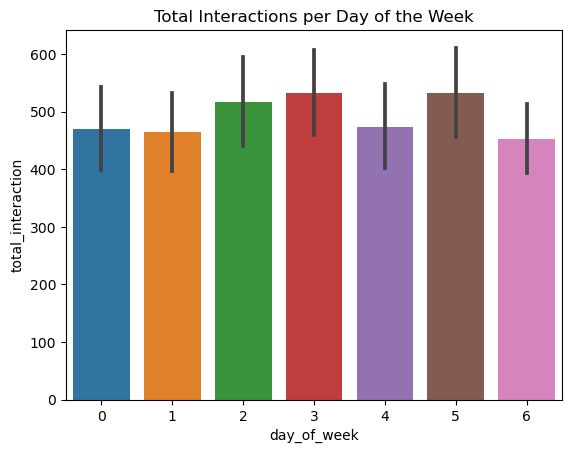

In [485]:
# Interaction per day of week
sns.barplot (data=datetime , y='total_interaction',x='day_of_week')
plt.title('Total Interactions per Day of the Week')
plt.show()

#### Even interactions spread across the week

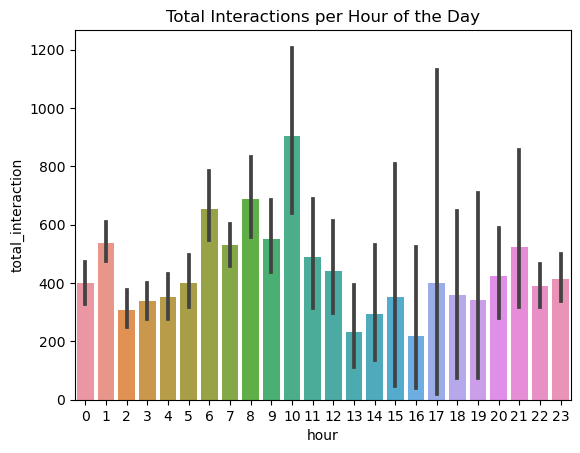

In [486]:
# Interaction per hour of day
sns.barplot (data=datetime , y='total_interaction',x='hour')
plt.title('Total Interactions per Hour of the Day')
plt.show()

#### Highest activity during morning hours (7-11)

# Predictive Model to Forecast Engagement Metrics of Future Posts 

* Using data from 2016 onwards as this was when "Reactions" were first introduced

In [545]:
start_date = 2016
df_after_2016 = df[df["year"] >= start_date]
df_after_2016 = df_after_2016[['status_type','sum_reactions','num_comments','num_shares','day','month','year','day_of_week','hour']]
df_after_2016.shape

(5340, 9)

In [562]:
df_after_2016 = df_after_2016[['status_type','sum_reactions','num_comments','num_shares']]

In [563]:
# Feature Vector and Target Variable
X = df_after_2016
y = df_after_2016['status_type']

# Convert Categorical variable to integer with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [564]:
X.head()

,status_type,sum_reactions,num_comments,num_shares
4732,3,97,177,210
4731,3,27,0,18
4730,1,2,0,0
4752,3,182,356,229
4751,3,29,0,3


In [565]:
# Feature scaling
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X = ms.fit_transform(X)


In [566]:
X = pd.DataFrame(X, columns = cols)
X

,status_type,sum_reactions,num_comments,num_shares
0,1.000000,0.021995,0.008433,0.061332
1,1.000000,0.006122,0.000000,0.005257
2,0.333333,0.000454,0.000000,0.000000
3,1.000000,0.041270,0.016960,0.066881
4,1.000000,0.006576,0.000000,0.000876
...,...,...,...,...
5335,0.333333,0.069615,0.000858,0.000000
5336,0.333333,0.005669,0.000381,0.000000
5337,0.333333,0.004762,0.000095,0.000000
5338,0.666667,0.024490,0.000381,0.000000


# K-Means Clustering

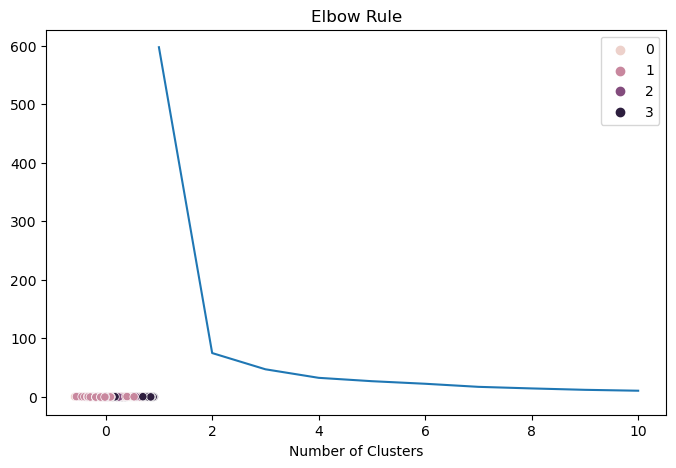

In [567]:
# Using Elbow Rule to find the optimate number of clusters, for K-Means clustering
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Elbow Rule')
plt.xlabel('Number of Clusters')
plt.show()

#### 2 clusters looks like the best

In [568]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# How many of the samples were labeled correctly

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 48 out of 5340 samples were correctly labeled.
Accuracy score: 0.01


Two clusters didn't give us very good results, so I will try other numbers of clusters

#### 3 Clusters

In [569]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# How many of the samples were labeled correctly

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 326 out of 5340 samples were correctly labeled.
Accuracy score: 0.06


#### 4 Clusters

In [570]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# How many of the samples were labeled correctly

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 539 out of 5340 samples were correctly labeled.
Accuracy score: 0.10


#### 6 Clusters

In [571]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# How many of the samples were labeled correctly

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4716 out of 5340 samples were correctly labeled.
Accuracy score: 0.88


#### 8 Clusters

In [572]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# How many of the samples were labeled correctly

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 370 out of 5340 samples were correctly labeled.
Accuracy score: 0.07


### 6 clusters gives the highest accuracy of 88%